In [1]:
import pandas as pd
idx = pd.date_range(start="1/1/2022", end="12/31/2024", freq="D")

In [2]:
t=pd.Series(range(0,len(idx)), index=idx,name="day")


In [14]:
import numpy as np
annuel=np.cos(2 * np.pi * t/365)
semestriel=np.cos(2 * np.pi * t/182)
fuite=t/90
fuite.iloc[90:]=0

Text(0.5, 1.0, 'série temporelle')

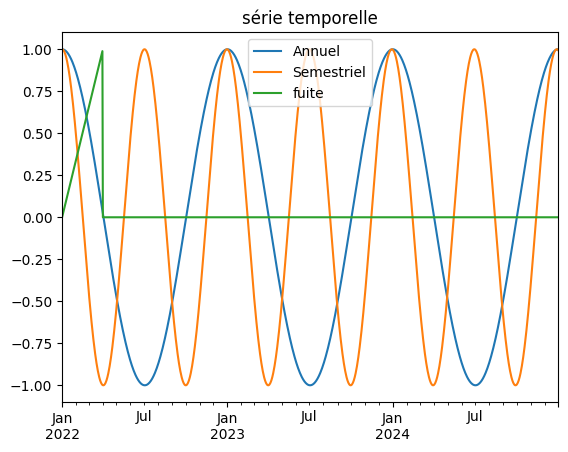

In [15]:
import matplotlib.pyplot as plt
annuel.plot(label="Annuel", legend=True)
semestriel.plot(label="Semestriel", legend=True)
fuite.plot(label="fuite", legend=True)
plt.title("série temporelle")

In [16]:
def calcul_spectre(s):
    '''
    cette fonction retourne la décomposition spectrale d'une série temporelle
    argument : série temporelle à décomposée
    return : série de l'amplitude du spectre FFT, index = période spectrale (1/fréquence)
    '''
    N = len(s)                     # nombre de points
    Y = np.fft.fft(s.values)       # coefficients FFT
    freqs = np.fft.fftfreq(N, 1)  # fréquences en cycles / jour
    mask=freqs>0
    spectre=pd.DataFrame({'periode':(1/freqs[mask]).astype(int),'amplitude':abs(Y[mask].real)}).groupby('periode').agg(amplitude=("amplitude","sum"))
    return spectre

In [17]:
spectre=pd.concat([calcul_spectre(annuel),calcul_spectre(semestriel),calcul_spectre(fuite)], axis=1)
spectre.columns=["annuel","semestriel","fuite"]

Text(0.5, 1.0, 'spectre FFT')

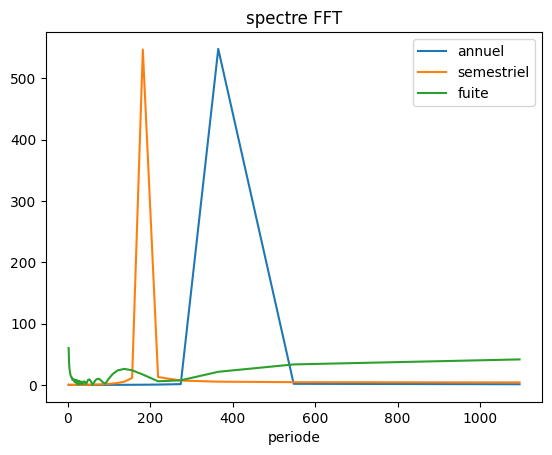

In [18]:
spectre.plot()
plt.title("spectre FFT")